In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import multi_cauchy as mc

In [2]:
sample = Path(".") / "sample_files"
angelica1 = mc.MvsHFile(sample / "201206 - Er_TiPs2COT_I_THF2 - 1 - 2 - MvsH.dat") # 1
angelica2 = mc.MvsHFile(sample / "200710 - [Er(TiPS2COT)I(THF)]2 - 2 - 1 - MvsH - VSM.dat") # 2
angelica3 = mc.MvsHFile(sample / "201201 - [Er_TIPS2COT_I]3 - 2 - 1 - MvsH.dat" ) # 3
max_ = mc.MvsHFile(sample / "210218 - [Er_TMSCOT_I_THF]_2 - 5 - 2 - MvHSweep.dat")
kyle1 = mc.MvsHFile(sample / "KMK311B_MvsH.dat")
kyle2 = mc.MvsHFile(sample / "KMK273S_MvsH_5K.dat")
zach = mc.MvsHFile(sample / "220711 - [Gd_COT_I]2_DPPE - 1 - 1 - MvH - Step - 2K.dat")

In [3]:
file = angelica2
file.temperatures

[2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 300.0]

C:\Users\pcb74\Documents\lab\Python\multi_cauchy\multi_cauchy\.venv\Lib\site-packages\numpy\lib\function_base.py:1240: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\Users\pcb74\Documents\lab\Python\multi_cauchy\multi_cauchy\.venv\Lib\site-packages\numpy\lib\function_base.py:1241: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\Users\pcb74\Documents\lab\Python\multi_cauchy\multi_cauchy\.venv\Lib\site-packages\numpy\lib\function_base.py:1248: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
C:\Users\pcb74\Documents\lab\Python\multi_cauchy\multi_cauchy\.venv\Lib\site-packages\numpy\lib\function_base.py:1257: RuntimeWarning: divide by zero encountered in scalar divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0


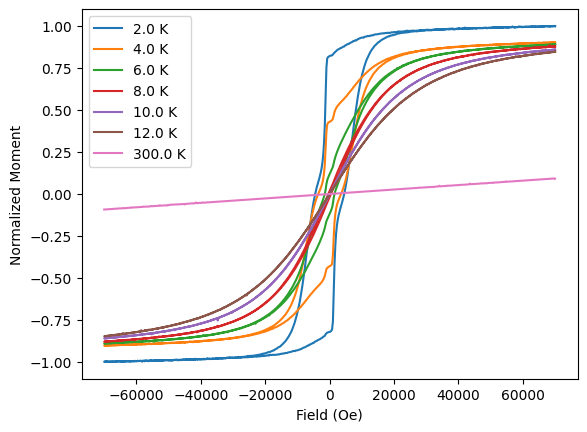

In [4]:
fig, ax = mc.plot_mvsh(file)

In [5]:
meas = mc.MvsHMeasurement(file,1)

[-1243.47717285156, 1256.42016601562, 7253.93505859375]

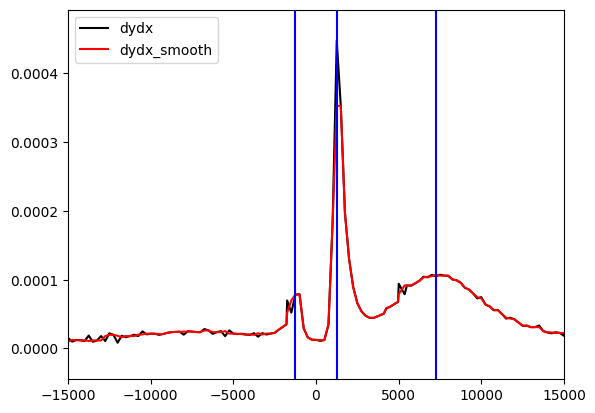

In [6]:
peaks, fig, ax = mc.quick_find_peaks(
    meas,
    # deriv_method="gradient",
    # smoothing_window_fn="median",
    # smoothing_window_size=5,
    # find_peaks_args={"distance": 25}
)
ax.set_xlim(-15000, 15000)
peaks

In [7]:
temp_peaks = peaks.copy()
# temp_peaks.append(-4000)
# temp_peaks = [0]
# temp_peaks.pop()
params = []
for peak in temp_peaks:
    gamma = 500
    params.append(mc.CauchyParams(1/len(peaks), peak, gamma))

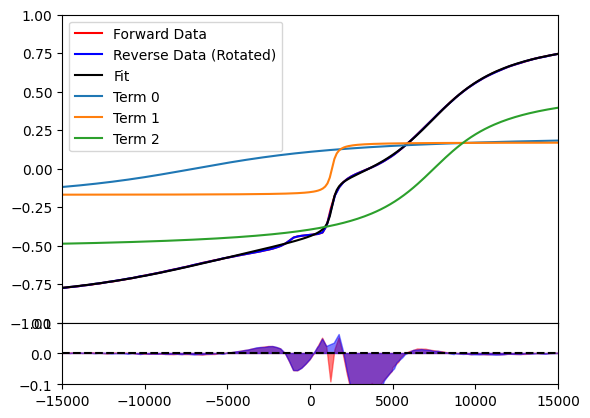

In [8]:
cdf_out = mc.fit_multi_cauchy_cdf(meas, params, sequence = "both")
fig, axs = mc.plot_cdf_fit(meas, cdf_out, sequence = "both")
# axs[1].set_xlim(-70000, 70000)


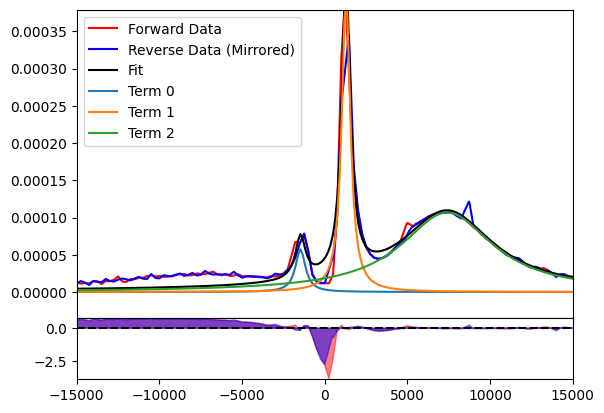

In [9]:
pdf_out = mc.fit_multi_cauchy_pdf(meas, params, sequence = "both")
fig, axs = mc.plot_pdf_fit(meas, pdf_out, sequence = "both")

In [10]:
# mc.write_report(file, meas, params, cdf_out, pdf_out)